# Part II - (PROSPER LOAN DATASET PRESENTATION)
## by (Solomon Kwadwo Achinah)


## Investigation Overview

> The general objective of this project is to present visualizations to show the relationship between features as provided in the Prosper loan dataset such as BorrowerRate, loan Term, BorrowerAPR,loan Status, ProsperRating(Alpha, occupation and many more. From the exploration, it can be observed there is a gradual increase in BorrowerRate across the Prosper ratings, with a corresponding upwards trends within each cluster for the loan status feature.

> A strong relationships exist between Prosper Rating vs Loan Status and the Prosper Score and Borrower’s rate. 


## Dataset Overview

>The Loan dataset provided by Prosper is used for the presentation, it contains both quantitative and qualitative features. This data set contains 113,937 rows of loans with 81 columns for variables on each loan, including loan amount, borrower rate, current loan status, borrower income, Prosper score, loan term and many more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data_loan=pd.read_csv('prosperLoanData.csv')

In [3]:
# Converting Category data types

data_loan['LoanStatus'] = data_loan['LoanStatus'].astype('category')
data_loan['ProsperRating (Alpha)'] = data_loan['ProsperRating (Alpha)'].astype('category')
data_loan['LoanOriginationDate'] = pd.to_datetime(data_loan['LoanOriginationDate'])

## Distribution of BorrowerRate and BorrowerAPR

> The distribution of BorrowerAPR and BorrowerRate looks similar with just a slight difference in the BorrowerAPR Which is always higher than the BorrowerRate. From the distribution, BorrowerAPR ranges 0.0065% to 0.51% whiles the BorrowerRate ranges from 0.0 to 0.49%. 

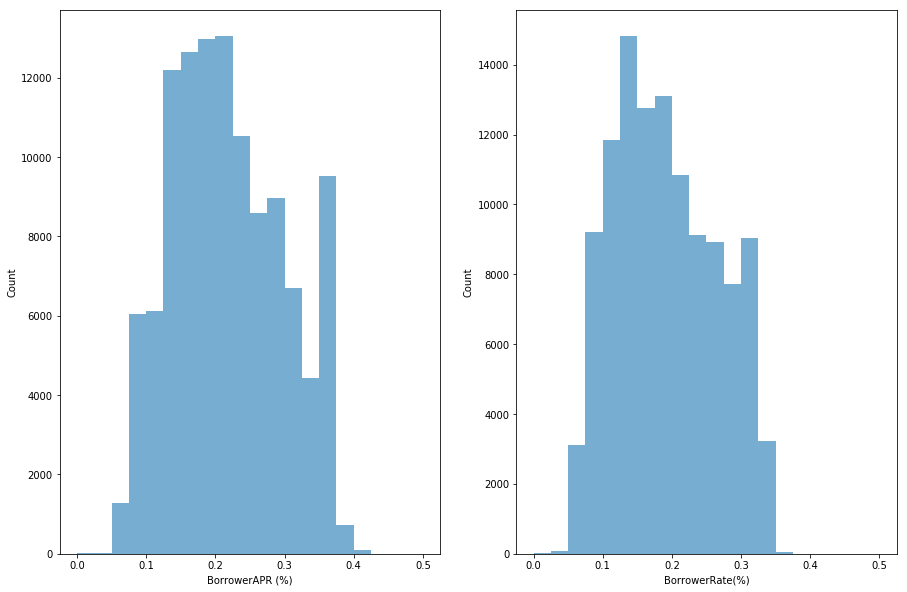

In [4]:
# Plotting BorrowerRate and BorrowerAPR 

fig=plt.figure(figsize=[15,10])

plt.subplot(1,2,1)
plt.hist(data_loan.BorrowerAPR, bins=20, alpha=0.6, range=(0.0, 0.5))
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(data_loan.BorrowerRate, bins=20, alpha=0.6, range=(0.0, 0.5) )
plt.xlabel('BorrowerRate(%)')
plt.ylabel('Count');

## Distribution of Loan Status

> According to Lending Club: In general, a note goes into Default status when it is 121 or more days past due. When a note is in Default status,  Charge Off occurs no later than 150 days past due (i.e. No later than 30  days after the Default status is reached) when there is no reasonable  expectation of sufficient payment to prevent the charge off. From the distribution, most of the loans are in 'current' status, followed by those 'completed'.  

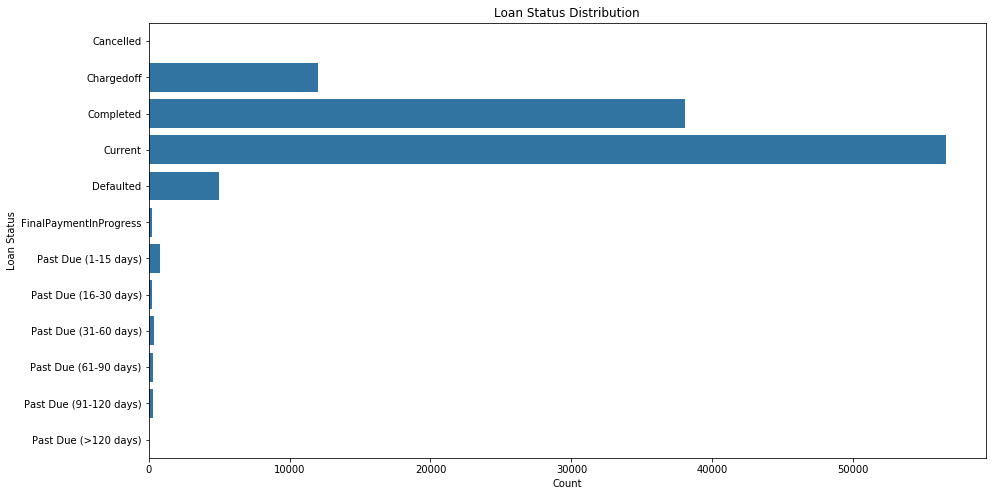

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(15,8))
sb.countplot(data = data_loan, y = 'LoanStatus', color = base_color);
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status');

## Distribition of Prosper Score

ProsperScore is a developed risk score technique using historical Prosper Borrower and Lender data. The score ranges from 1 to 10, with 10 being the best, or lowest  risk score.

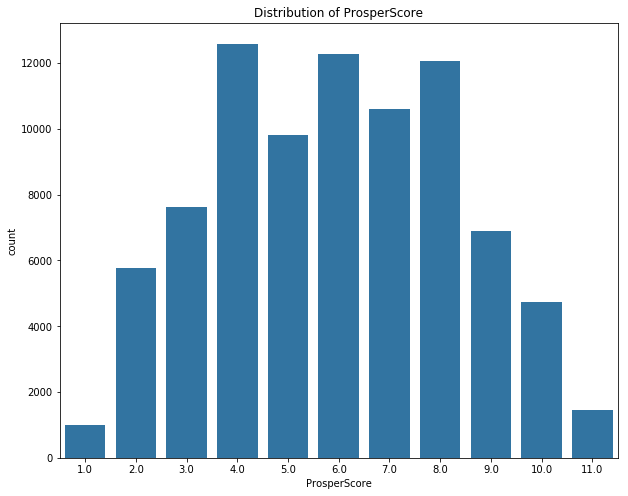

In [6]:
plt.figure(figsize=(10,8))
sb.countplot(data = data_loan, x ="ProsperScore", color = base_color);
plt.title('Distribution of ProsperScore');


## Distribition of BorrowerRate vs. BorrowerAPR
We can observe a positive correlation between BorrowerAPR and BorrowerRate. 

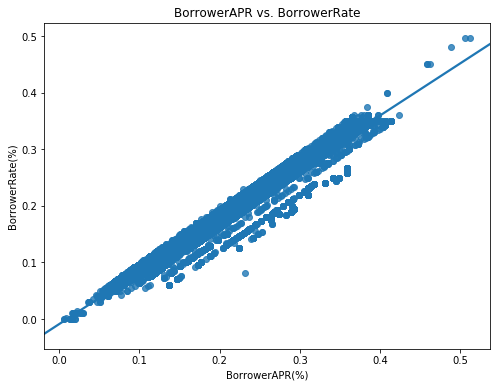

In [7]:
# BorrowerAPR and BorrowerRate

plt.figure(figsize=(8, 6))
sb.regplot(data = data_loan, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.title('BorrowerAPR vs. BorrowerRate')
plt.xlabel('BorrowerAPR(%)')
plt.ylabel('BorrowerRate(%)');


## Interest Rates over Time

The distribution looks too noisy when Interest rate is plot against LoanOriginationDate. 
After converting 'LoanOriginationDate'to 'year', and plotting it against Interest rate, 
no obvious monotonic behaviors is observed. 
Hence, Time alone may not be a good feature to predict a borrower’s interest rate.

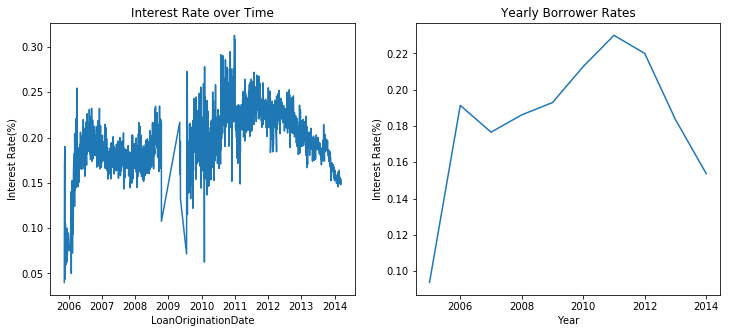

In [8]:
#Converting datetime to year
data_loan['year'] = data_loan['LoanOriginationDate'].dt.year
#Plotting the BorrowerRate vs Time
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(data_loan.groupby('LoanOriginationDate')['BorrowerRate'].mean());
plt.title('Interest Rate over Time')
plt.ylabel('Interest Rate(%)')
plt.xlabel('LoanOriginationDate');

plt.subplot(1,2,2)
plt.plot(data_loan.groupby('year')['BorrowerRate'].mean());
plt.title('Yearly Borrower Rates')
plt.ylabel('Interest Rate(%)')
plt.xlabel('Year');

##  Borrower Rate vs. Loan Status vs. ProsperRating (Alpha)

From the figure, there is a gradual increase in BorrowerRate across the Prosper ratings, with a corresponding upwards trends within each cluster for the loan status feature. It can be observed that only a few borrowers have been classified in the Prosper Rating of AA. The proportion of loans in the lower rating groups are significantly higher.

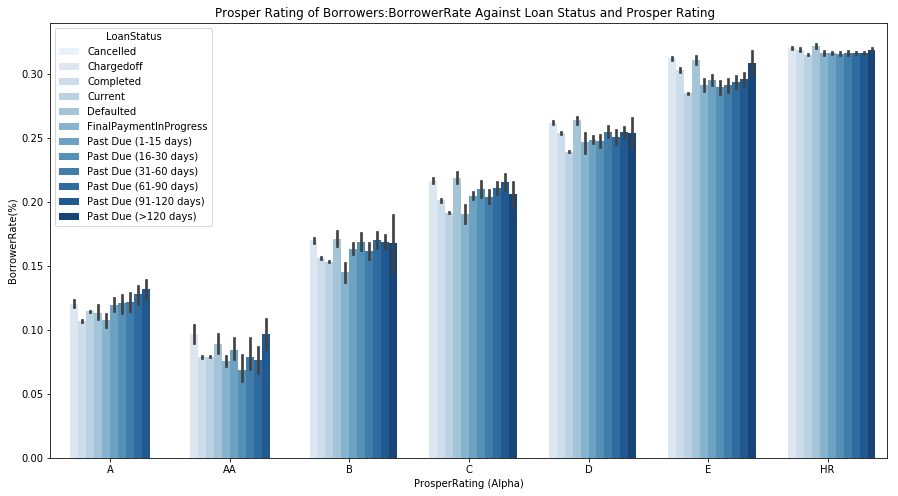

In [9]:
#multivariate plot of Borrower Rate, ProsperRating and Loan Status
plt.figure(figsize = (15, 8))
sb.barplot(data = data_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'LoanStatus', palette="Blues")
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('BorrowerRate(%)')
plt.title('Prosper Rating of Borrowers:BorrowerRate Against Loan Status and Prosper Rating  ')
plt.show();

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 466727 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/